<a href="https://colab.research.google.com/github/surabhiworld/DS-visualization-of-movie-dataset/blob/main/Assignment_28_Jan_2022(movie_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Profit = (Revenue - Budget)/Budget
2.Do the movies that have high vote_avergae make lot of profits ?
3.What genres make the most money?
4.Which producers generally do well?
5.Is there a bias with producers in terms of genres that they do - Do specific producer only produce specific genre movies?
6.Will a longer run time bring higher profits?
7.Does the presence of a homepage indicate higher profits
8.Which languages rakes in high profit
9.Over a period of time, how have the profitability changed - Over the period of time, which genre of movies have grossed well ?
10.If the movie speaks multiple languages, is the profit % higher?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [39]:
df = pd.read_csv('/content/drive/MyDrive/datasets/finalCleanedData.csv')

In [3]:
df.head(5)

,Unnamed: 0,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,genre4,genre1,genre2,genre3,homePagePresent,score,Producer1,Producer2,TotalLanguages,profit
0,0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,NaN,Animation,Comedy,Family,True,41695.5,pixar animation studios,NaN,1,11.451801
1,1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,NaN,Adventure,Fantasy,Family,False,16649.7,tristar pictures,teitler film,2,3.043035
2,3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,NaN,Comedy,Drama,Romance,False,207.4,twentieth century fox film corporation,NaN,1,4.090760
3,5,0,60000000,949,tt0113277,en,heat,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170.0,Released,A Los Angeles Crime Saga,False,7.7,1886,-1,Thriller,Action,Crime,Drama,False,14522.2,regency enterprises,forward pass,2,2.123947
4,8,0,35000000,9091,tt0114576,en,sudden death,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106.0,Released,Terror goes into overtime.,False,5.5,174,-1,NaN,Action,Adventure,Thriller,False,957.0,universal pictures,imperial entertainment,1,0.838576


# **1.Profit = (Revenue - Budget)/Budget**

Text(0, 0.5, 'Amount')

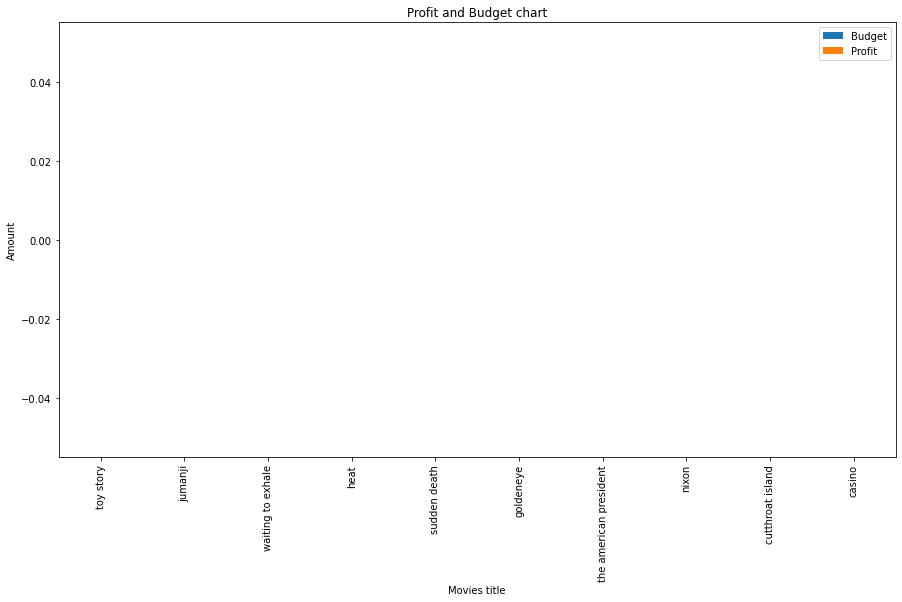

In [4]:
plotdata = pd.DataFrame({

    "Budget":df["budget"][:10],

    "Profit":df["revenue"][:10]},

    index=df["original_title"][:10])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Profit and Budget chart")

plt.xlabel("Movies title")

plt.ylabel("Amount")

# **2. Do the movies that have high vote_average make lot of profits?**

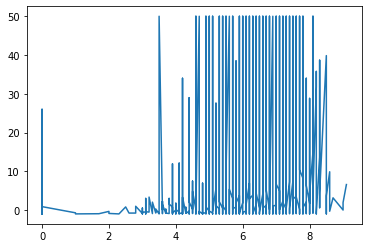

In [5]:
df2 = df.sort_values(by=['vote_average'])
plt.plot(df2["vote_average"], df2["profit"])
plt.show()

**Remarks for above question:**  As we can see most of the profit spikes are available on the movies which has greater than 6 vote average. So yes higher vote average movies has higher profits.

# **3**. What genres make the most money?

In [6]:
df["genre1"].isna().sum()

12

In [7]:
df3 = df[df['genre1'].notna()]

In [8]:
# df3["genre1"].unique()
var = df3.groupby('genre1').profit.sum() 
var

genre1
Action             2074.557455
Adventure          1415.537174
Animation           509.718019
Comedy             3685.455547
Crime               586.253217
Documentary         381.665729
Drama              4161.239990
Family              250.251842
Fantasy             391.741777
Foreign              35.420391
History             113.232991
Horror             2319.136159
Music                93.569006
Mystery             265.788415
Romance             379.404025
Science Fiction     424.613043
TV Movie              7.400000
Thriller            485.406117
War                  92.064424
Western             162.089816
Name: profit, dtype: float64

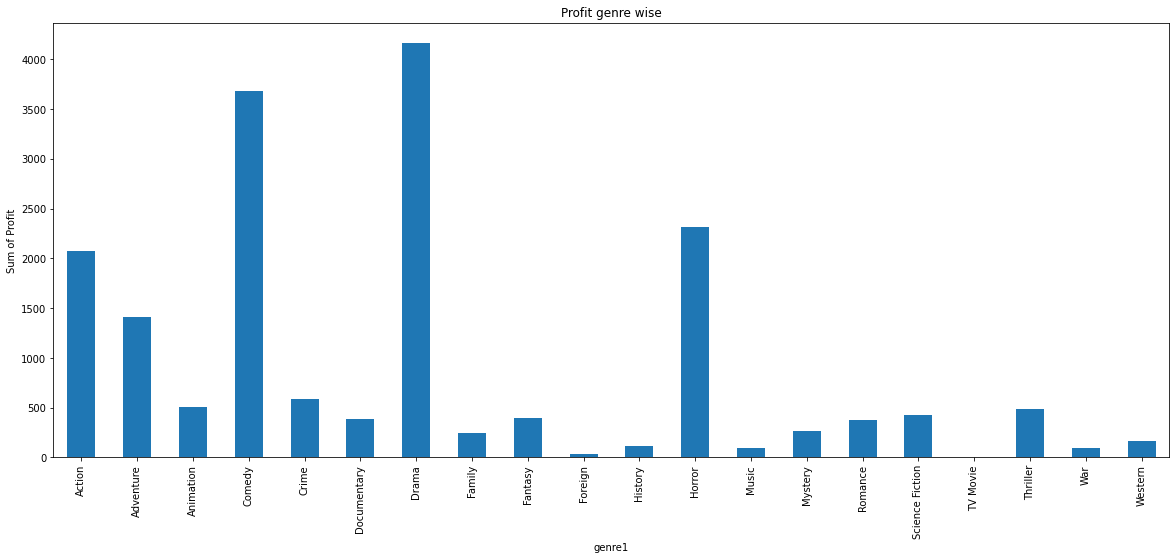

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Genre')  
ax1.set_ylabel('Sum of Profit') 
ax1.set_title("Profit genre wise") 
var.plot(kind='bar',figsize=(20, 8)) 

**Remarks for above question:**  As per the graph Drama, comedy, horor types of movies genres make the most money.

# **4. Which producers generally do well?**

In [9]:
df["Producer1"].isna().sum()

181

In [11]:
df4 = df[df['Producer1'].notna()]

In [12]:
df4["Producer1"].unique()

array(['pixar animation studios', 'tristar pictures',
       'twentieth century fox film corporation', ..., 's pictures',
       'talent house', 'кинокомпания «lunapark»'], dtype=object)

In [13]:
b = df4["Producer1"].unique()
len(b)

1357

In [14]:
df4_1 = df4.groupby("Producer1").profit.sum().to_frame("Profit").reset_index()
df4_1

,Producer1,Profit
0,100 bares,16.073831
1,10th hole productions,-0.972484
2,120db films,50.000000
3,1492 pictures,20.593873
4,1818,1.446526
...,...,...
1352,zyzzyx llc,-0.999985
1353,österreichischer rundfunk (orf),-0.999756
1354,вольга,1.228115
1355,кинокомпания «lunapark»,-0.999996


In [15]:
df4_1 = df4_1.sort_values('Profit', ascending=False)

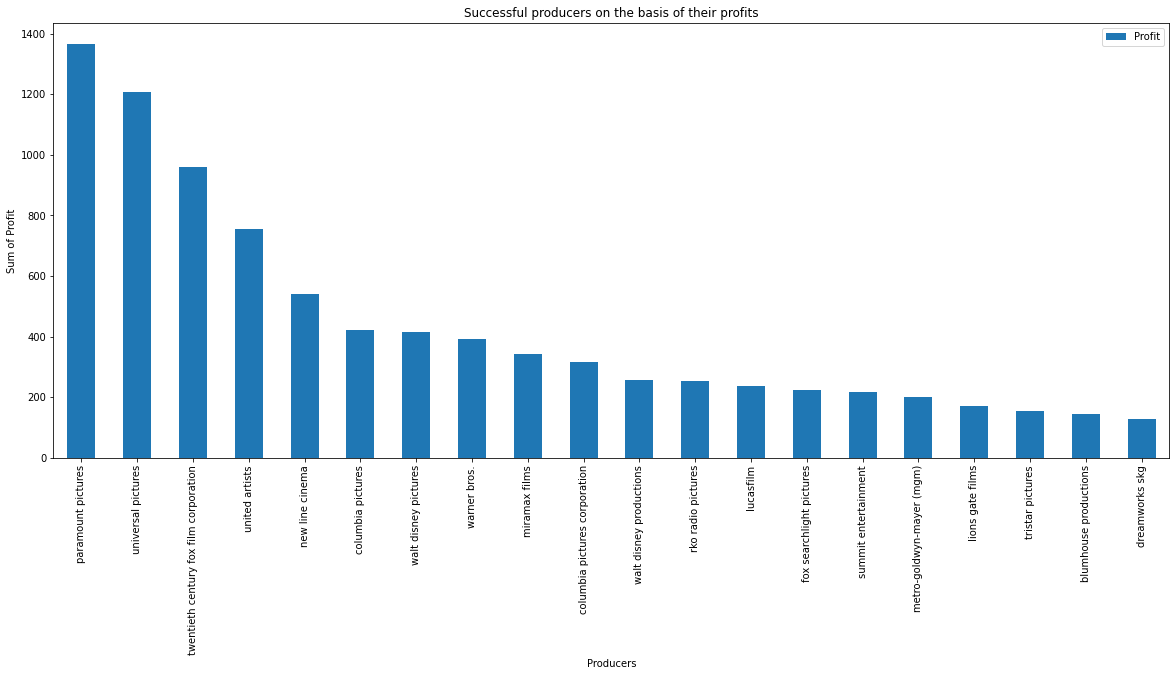

In [16]:
df4_1[:20].plot(
    x = "Producer1",
    y = "Profit",
    kind='bar',
    xlabel ='Producers',
    ylabel = 'Sum of Profit',
    title ='Successful producers on the basis of their profits',
    figsize=(20, 8)) 

**Remarks for above question:**  As per the above graph Paramount Pictures and universal pictures are most successful

# **5.Is there a bias with producers in terms of genres that they do - Do specific producer only produce specific genre movies?**

**Remarks for above question:**  

# **6. Will a longer run time bring higher profits?**

In [17]:
df6 = df[["runtime", "profit"]].copy()

In [18]:
df6.isna().sum()

runtime    1
profit     0
dtype: int64

In [19]:
df6 = df6[df6['runtime'].notna()]
df6 = df6.sort_values('runtime', ascending=False)
df6

,runtime,profit
3690,338.0,-0.951596
4121,320.0,1.928571
1505,248.0,1.281858
302,238.0,50.000000
2291,225.0,50.000000
...,...,...
4747,0.0,1.759515
5371,0.0,-0.999996
5344,0.0,-0.216054
4758,0.0,0.600000


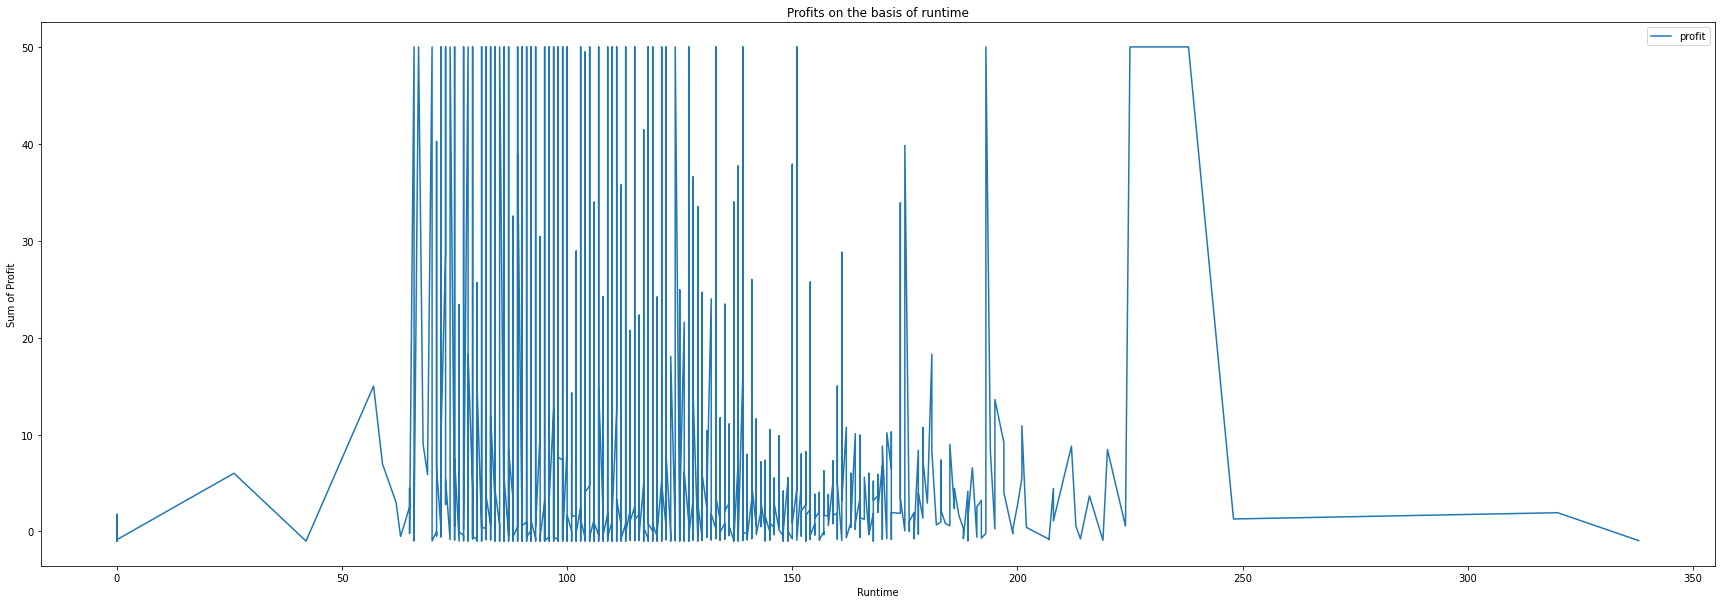

In [20]:
df6.plot(
    x = "runtime",
    y = "profit",
    kind='line',
    xlabel ='Runtime',
    ylabel = 'Sum of Profit',
    title ='Profits on the basis of runtime',
    figsize=(30, 10)) 

**Remarks for above question:**  As per the latest graph movies which has runtime between 70 to 150 earns most profit.

# **7. Does the presence of a homepage indicate higher profits**

In [21]:
df["homePagePresent"].isna().sum()

0

In [22]:
df7 = df.groupby("homePagePresent").profit.sum().to_frame("Profit")
df7

,Profit
homePagePresent,
False,10883.359389
True,6980.209572


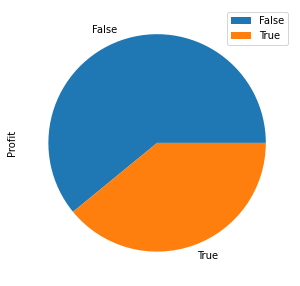

In [23]:
df7.plot.pie(y="Profit", figsize=(5, 5)) 

**Remarks for above question:**  As per the above graph, the movies which doesnt have home page present earns most.

# **8. Which languages takes in high profit**

In [24]:
df["original_language"].isna().sum()

0

In [25]:
len(df["original_language"].unique())

40

In [ ]:
#Draw bar chart with profit on y axis and original_language in x axis

In [40]:
df8 = df.groupby("original_language").profit.sum().to_frame("Profit").reset_index()
df8

,original_language,Profit
0,af,2.293324
1,bm,-0.944500
2,ca,-0.371557
3,cn,85.605669
4,da,10.926676
5,de,79.518891
6,el,50.000000
7,en,16012.094527
8,es,126.350820
9,fa,4.000000


In [41]:
df8 = df8.sort_values('Profit', ascending=False)

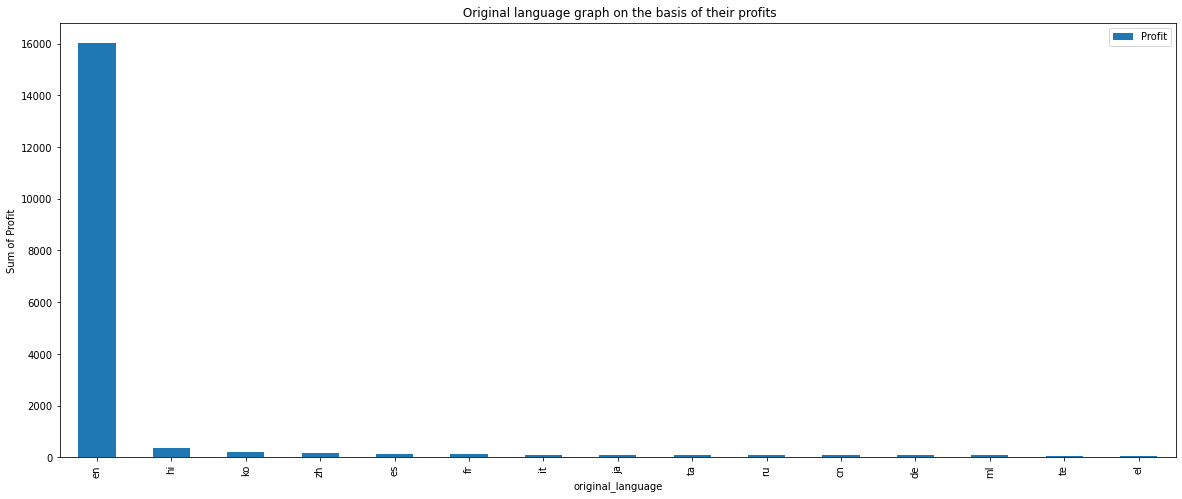

In [43]:
df8[:15].plot(
    x = "original_language",
    y = "Profit",
    kind='bar',
    xlabel ='original_language',
    ylabel = 'Sum of Profit',
    title =' Original language graph on the basis of their profits',
    figsize=(20, 8))

**Remarks for above question: ** english movies earns most

# **9. Over a period of time, how have the profitability changed - Over the period of time, which genre of movies have grossed well ?**

In [44]:
df9 = df[["release_date", "profit", "genre1"]].copy()
df9 = df9[df9['genre1'].notna()]

In [45]:
df9["release_date"] = pd.to_datetime(df9['release_date'])

In [46]:
df9['year'] = df9['release_date'].dt.year

In [47]:
df9 = df9.sort_values('year')
df9

,release_date,profit,genre1,year
2169,1915-02-08,50.000000,Drama,1915
2437,1915-12-13,6.935128,Drama,1915
3246,1916-12-24,39.000000,Adventure,1916
4970,1918-08-01,31.000000,Comedy,1918
1196,1921-01-21,9.000000,Comedy,1921
...,...,...,...,...
5284,2017-03-31,-0.643489,Action,2017
5283,2017-05-09,1.395673,Horror,2017
5282,2017-03-23,0.423372,Action,2017
5297,2017-04-06,-0.999671,Drama,2017


# **10. If the movie speaks multiple languages, is the profit % higher?**

In [48]:

df["TotalLanguages"].isna().sum()

0

In [49]:
len(df["TotalLanguages"].unique())

10

In [ ]:
#Draw bar chart with profit on y axis and totallanguages in x axis

In [55]:
df10 = df.groupby("TotalLanguages").profit.sum().to_frame("Profit").reset_index()
df10

,TotalLanguages,Profit
0,0,148.437005
1,1,13113.647444
2,2,2794.784823
3,3,1177.320027
4,4,396.948804
5,5,106.155421
6,6,109.875072
7,7,10.902919
8,8,-0.514852
9,9,6.012298


In [56]:
df10 = df10.sort_values('Profit', ascending=False)

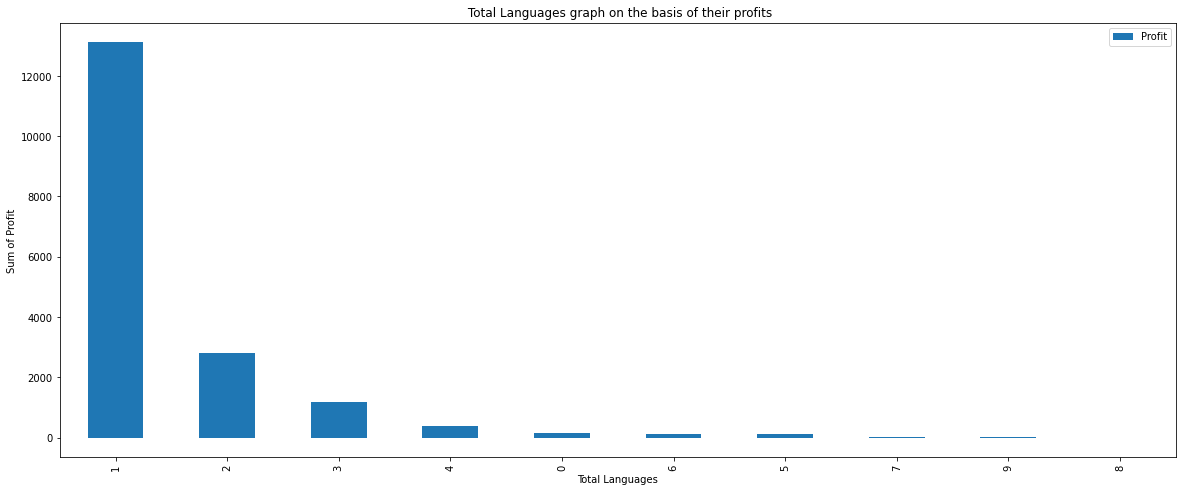

In [58]:
df10.plot(
    x = "TotalLanguages",
    y = "Profit",
    kind='bar',
    xlabel ='Total Languages',
    ylabel = 'Sum of Profit',
    title =' Total Languages graph on the basis of their profits',
    figsize=(20, 8))

**Remarks for above question: ** Movies which has single language earns most profit.